In [70]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd

# Importando o excel de parametro
dados = pd.read_excel('C:/Users/Alan/Documents/TCC.xlsx')

n_points = 50
width = 150
depth = 100

x = np.linspace(0, width, n_points)
y = np.linspace(0, depth, n_points)
z = np.linspace(0, -5, n_points)
X, Y = np.meshgrid(x, y)

def get_terrain_height(x, y):
    z = 0
    if x > 0 and y > 0:
        z -= 1
    return z / 1

n_points_bottom = 50
x_bottom = np.linspace(0, width, n_points_bottom)
y_bottom = np.linspace(0, depth, n_points_bottom)
X_bottom, Y_bottom = np.meshgrid(x_bottom, y_bottom)

Z_bottom = np.random.rand(n_points_bottom, n_points_bottom) / 10

# Usar a coluna "Altura" dos dados como valores Z e a coluna "Largura" como valores X
altura = dados["Altura"]
largura = dados["Largura"]
profundidade = dados["Profundidade"]

fig = go.Figure()

# adicionando a superfície com elevações de ruído na parte inferior
fig.add_trace(go.Surface(x=X_bottom, y=Y_bottom, z=Z_bottom, colorscale='turbid', 
                         showscale=False, opacity=0.7, reversescale=True))

# adicionando a superfície principal
fig.add_trace(go.Surface(x=X, y=Y, z=Z, colorscale='turbid', 
                         colorbar=dict(len=0.5, y=0.5), showscale=True, opacity=0.55, reversescale=True))

# Adicionar todos os pontos da coluna "Altura" com coordenadas X da coluna "Largura"
for i in range(len(altura)):
    fig.add_trace(go.Scatter3d(x=[largura.iloc[i]], y=[profundidade.iloc[i]], z=[altura.iloc[i]], mode='markers', 
                               marker=dict(size=5, color='red')))

fig.update_layout(title='Mapa de Terreno',
                  scene=dict(xaxis_title='Largura',
                             yaxis_title='Profundidade',
                             zaxis_title='Altura',
                             xaxis=dict(range=[0, width], autorange=False),
                             yaxis=dict(range=[0, depth], autorange=False),
                             zaxis=dict(range=[-1, 1], autorange=False),
                             aspectratio=dict(x=2, y=1, z=0.7),
                             ))

fig.show()


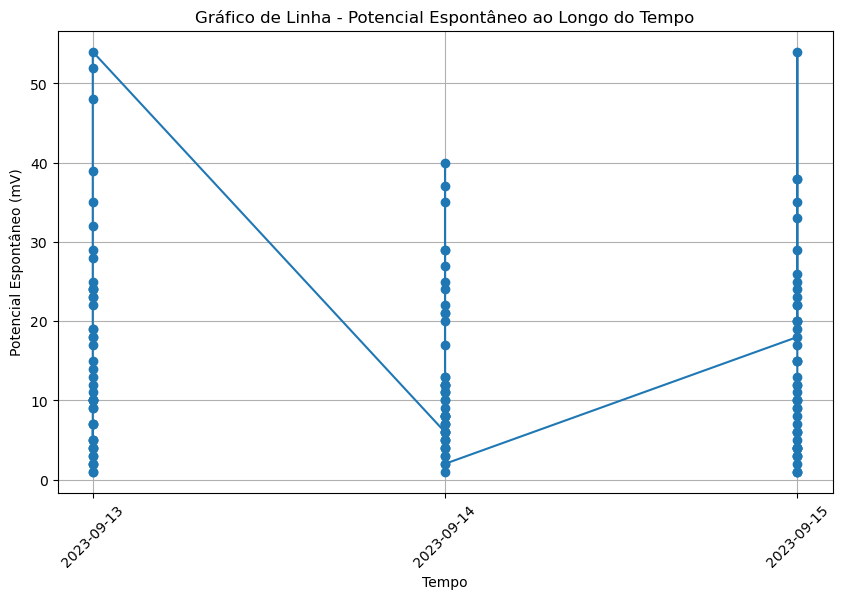

In [78]:
import numpy as np
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt

# Importando o excel de parametro
dados = pd.read_excel('C:/Users/Alan/Documents/TCC.xlsx')
dados_ = pd.read_excel('C:/Users/Alan/Documents/TCC_TEMPO.xlsx')

# Altura do maquete
altura = dados["Altura"]

# Largura da maquete
largura = dados["Largura"]

# Profundidade da maquete
profundidade = dados["Profundidade"]

# Voltagem capturada com voltímetro
voltagem = dados["Voltagem"]
voltagem_ = dados_["Voltagem"]

fig = go.Figure()
fig.add_trace(go.Scatter(x=altura, y=voltagem, mode='markers', name='Potencial Espontâneo vs. Altura'))
fig.update_layout(title='Gráfico de Dispersão - Potencial Espontâneo vs. Altura',
                  xaxis_title='Altura (unidade)',
                  yaxis_title='Potencial Espontâneo (mV)')

fig.show()

fig = go.Figure()
fig.add_trace(go.Bar(x=largura, y=voltagem, name='Potencial Espontâneo vs. Largura'))
fig.update_layout(title='Gráfico de Barras - Potencial Espontâneo vs. Largura',
                  xaxis_title='Largura (unidade)',
                  yaxis_title='Potencial Espontâneo (mV)')

fig.show()

# Converter a coluna de tempo para strings
tempo = dados_["Tempo"].astype(str)

plt.figure(figsize=(10, 6))
plt.plot(tempo, voltagem_, marker='o', linestyle='-')
plt.title('Gráfico de Linha - Potencial Espontâneo ao Longo do Tempo')
plt.xlabel('Tempo')
plt.ylabel('Potencial Espontâneo (mV)')
plt.grid(True)
plt.xticks(rotation=45)  # Rotaciona os rótulos do eixo x para melhor legibilidade
plt.show()


fig = go.Figure(data=[go.Scatter3d(x=altura, y=largura, z=voltagem, mode='markers',
                                   marker=dict(size=5, color=voltagem, colorscale='Viridis', opacity=0.8))])
fig.update_layout(scene=dict(xaxis_title='Altura', yaxis_title='Largura', zaxis_title='Potencial Espontâneo (mV)'),
                  title='Gráfico de Dispersão 3D - Potencial Espontâneo vs. Altura e Largura')
fig.show()
